In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
import seaborn as sns
from sklearn import metrics

In [2]:
evaluation = pd.read_excel('Contents.xlsx',sheet_name=0)
evaluation

,NickName,Date,Content,Type
0,AdJQKzNaZWAV,2016-04-14 23:30:42,想知道是不是卖家给我发错货了，怎么四个连接铁通的仅一个能连上，**块钱的东西说便宜也不至于廉...,Negative
1,sdmjk,2013-06-24 22:37:51,垃圾。\n两个管两头一样粗，得自己用钳子摄细才能装上\n管子很软很细\n总的评价 - 就是两...,Negative
2,f***n,2015-06-05 21:10:31,我就无语了...难弄到死..又没说明书..过段差评..,Negative
3,jd_817039867,2014-04-13 22:43:38,不满意，明明写的落地！结果差一截！而且自垂度不怎么好～还要用夹子夹！没有我在附近小超市买的质...,Negative
4,jd_wscj529,2014-06-09 13:06:17,标的次日到达，结果快递用了四天，蚊帐杆底座太小，管壁太薄，而且蚊帐也没宣传那么垂地，此次购物...,Negative
...,...,...,...,...
10640,喵***名,2016-08-13 10:50:16,有活动 减价才买的 要不根本不值那个价格 支撑很不稳 蚊帐一弄就碎,Negative
10641,k***o,2017-04-24 01:45:57,质量还行，关键是蚊子咬不着俺了！,Positive
10642,c***9,2016-03-25 13:50:52,不锈钢有几根变形，而且很薄，不满意,Negative
10643,xiaozhu333,2013-06-24 18:59:29,第一：快递太慢了，18号晚上下的单，那就算19号下单呗，一直到今天下午才送货，一个星期了。就...,Negative


In [3]:
#运用正则表达式将评论中的数字和英文去除
evaluation.Content = evaluation.Content.str.replace('[0-9a-zA-Z]','')
evaluation

C:\Users\Jay Shen\AppData\Local\Temp\ipykernel_3264\215469740.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  evaluation.Content = evaluation.Content.str.replace('[0-9a-zA-Z]','')


,NickName,Date,Content,Type
0,AdJQKzNaZWAV,2016-04-14 23:30:42,想知道是不是卖家给我发错货了，怎么四个连接铁通的仅一个能连上，**块钱的东西说便宜也不至于廉...,Negative
1,sdmjk,2013-06-24 22:37:51,垃圾。\n两个管两头一样粗，得自己用钳子摄细才能装上\n管子很软很细\n总的评价 - 就是两...,Negative
2,f***n,2015-06-05 21:10:31,我就无语了...难弄到死..又没说明书..过段差评..,Negative
3,jd_817039867,2014-04-13 22:43:38,不满意，明明写的落地！结果差一截！而且自垂度不怎么好～还要用夹子夹！没有我在附近小超市买的质...,Negative
4,jd_wscj529,2014-06-09 13:06:17,标的次日到达，结果快递用了四天，蚊帐杆底座太小，管壁太薄，而且蚊帐也没宣传那么垂地，此次购物...,Negative
...,...,...,...,...
10640,喵***名,2016-08-13 10:50:16,有活动 减价才买的 要不根本不值那个价格 支撑很不稳 蚊帐一弄就碎,Negative
10641,k***o,2017-04-24 01:45:57,质量还行，关键是蚊子咬不着俺了！,Positive
10642,c***9,2016-03-25 13:50:52,不锈钢有几根变形，而且很薄，不满意,Negative
10643,xiaozhu333,2013-06-24 18:59:29,第一：快递太慢了，号晚上下的单，那就算号下单呗，一直到今天下午才送货，一个星期了。就算我在广...,Negative


In [4]:
import jieba

In [5]:
#加载自定义词库
jieba.load_userdict('all_words.txt')

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\JAYSHE~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.498 seconds.
Prefix dict has been built successfully.


In [6]:
#读入停止词
with open('mystopwords.txt',encoding='UTF-8') as words:
    stop_words = [i.strip() for i in words.readlines()]

In [7]:
#构造切词的自定义函数，并在切词过程中删除停止词
def cut_word(sentence):
    words = [i for i in jieba.lcut(sentence) if i not in stop_words]
    #切完的词用空格隔开
    result = ' '.join(words)
    return result

#调用自定义函数，并对评论内容进行批量切词
words = evaluation.Content.apply(cut_word)
#前5行内容的切词效果
words[:5]

0                  想 卖家 给我发 错货 四个 连接 铁通 块钱 便宜 廉价 退货
1           垃圾 \n 钳子 摄细 装 \n 管子 很软 \n 评价         垃圾
2                       我就 无语 难弄 .. 说明书 .. 过段 差评 ..
3    不满意 写 落地 差一截 垂度 ～ 夹子 夹 没有 超市 买 质量好 换季 卖得 价钱 便宜
4      标的 到达 快递 四天 蚊帐 底座 太小 管壁 太薄 蚊帐 也没 宣传 垂地 购物 失败
Name: Content, dtype: object

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
#计算每个词再各评论内容中的次数，并将稀疏度为99%以上的词删除
counts = CountVectorizer(min_df = 0.01)

In [10]:
#文档词条矩阵
dtm_counts = counts.fit_transform(words).toarray()

In [11]:
#矩阵的列名称
columns = counts.get_feature_names()

D:\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [12]:
#将举证转换为数据框,即X变量
X = pd.DataFrame(dtm_counts,columns = columns)

In [13]:
#情感标签变量
y = evaluation.Type
X.head()

,一根,下单,不值,不好,不想,不满意,不知道,不行,不错,买回来,...,还好,还行,退货,送货,速度,钢管,防蚊,非常好,颜色,麻烦
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#将数据集拆分为训练集和测试集
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size = 0.25,random_state=1)

In [17]:
#构建伯努利贝叶斯分类器
from sklearn import naive_bayes
bnb = naive_bayes.BernoulliNB()

In [18]:
#模型再训练数据集上的集合
bnb.fit(X_train,y_train)

BernoulliNB()

In [19]:
#模型再测试数据集上的预测
bnb_pred = bnb.predict(X_test)

In [21]:
#构建混淆举证
cm = pd.crosstab(bnb_pred,y_test)

Text(33.0, 0.5, 'Predict')

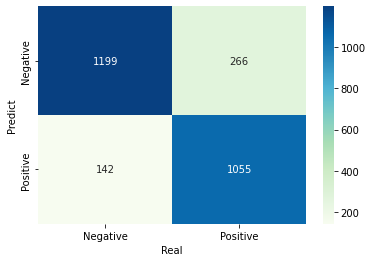

In [23]:
sns.heatmap(cm,annot=True,cmap = 'GnBu',fmt='d')
#去除x轴和y轴标签
plt.xlabel("Real")
plt.ylabel("Predict")

In [24]:
#模型的预测准确率
print("模型的准确率为:\n",metrics.accuracy_score(y_test,bnb_pred))
print("模型的评估报告为:\n",metrics.classification_report(y_test,bnb_pred))

模型的准确率为:
 0.8467317806160781
模型的评估报告为:
               precision    recall  f1-score   support

    Negative       0.82      0.89      0.85      1341
    Positive       0.88      0.80      0.84      1321

    accuracy                           0.85      2662
   macro avg       0.85      0.85      0.85      2662
weighted avg       0.85      0.85      0.85      2662



In [25]:
#计算正例的预测概率，用于生成ROC曲线的数据
y_score = bnb.predict_proba(X_test)[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test.map({'Negative':0,'Positive':1}),y_score)

In [26]:
#计算AUC
roc_auc = metrics.auc(fpr,tpr)

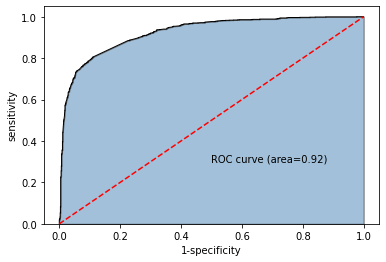

In [27]:
#绘制面积图
plt.stackplot(fpr,tpr,color='steelblue',alpha=0.5,edgecolor='black')
#添加边际线
plt.plot(fpr,tpr,color='black',lw=1)
#添加对角线
plt.plot([0,1],[0,1],color='red',linestyle='--')
#添加文本信息
plt.text(0.5,0.3,'ROC curve (area=%0.2f)'%roc_auc)
plt.xlabel('1-specificity')
plt.ylabel('sensitivity')
plt.show()